In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('data.xls', header=None)
data1 = data.drop(data.columns[-3:], axis=1)

## Первичный анализ (характеристика, анализ, о нормировке)


In [8]:
data1.rename(columns={0: 'Возраст', 1: 'Количество иждивенцев', 2: 'Доход', 3: 'Срок проживания в регионе', 4: 'Оценка автомобиля заемщика', 5: 'Размер кредита'}, inplace=True)
data1

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
0,35,2,30500,7,30000,301000
1,36,2,26200,8,26000,259000
2,49,3,10200,16,12000,111000
3,52,4,40300,16,43000,422000
4,48,3,11400,15,13000,122000
...,...,...,...,...,...,...
65,39,3,37100,9,37000,373000
66,48,3,9500,15,11000,103000
67,30,1,33800,3,32000,328000
68,45,2,4600,14,5000,49000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Возраст                     70 non-null     int64
 1   Количество иждивенцев       70 non-null     int64
 2   Доход                       70 non-null     int64
 3   Срок проживания в регионе   70 non-null     int64
 4   Оценка автомобиля заемщика  70 non-null     int64
 5   Размер кредита              70 non-null     int64
dtypes: int64(6)
memory usage: 3.4 KB


In [10]:
mean = data1.mean()
std = data1.std()
median = data1.median()
quartiles = data1.quantile([0.25, 0.5, 0.75])
max = data1.max()
min = data1.min()

In [11]:
summary_table = pd.DataFrame({
    'Среднее': mean,
    'Стандартное отклонение': std,
    'Медианы': median,
    '25-й перцентиль': quartiles.loc[0.25],
    '50-й перцентиль (медиана)': quartiles.loc[0.50],
    '75-й перцентиль': quartiles.loc[0.75],
    'Минимум': min,
    'Максимум': max
})

summary_table = summary_table.round(2)

print("Резюме данных:")
print(summary_table.to_string())

Резюме данных:
                              Среднее  Стандартное отклонение   Медианы  25-й перцентиль  50-й перцентиль (медиана)  75-й перцентиль  Минимум  Максимум
Возраст                         39.99                    8.07      39.0            34.25                       39.0             46.5       20        60
Количество иждивенцев            2.07                    1.03       2.0             1.25                        2.0              3.0       -1         5
Доход                        20000.00                 9999.39   20250.0         11325.00                    20250.0          26875.0     2600     40300
Срок проживания в регионе        9.96                    5.02       9.0             6.25                        9.0             14.0       -2        22
Оценка автомобиля заемщика   20014.29                 9927.99   20000.0         12000.00                    20000.0          26750.0     2000     43000
Размер кредита              200014.29               100000.36  199500.0  

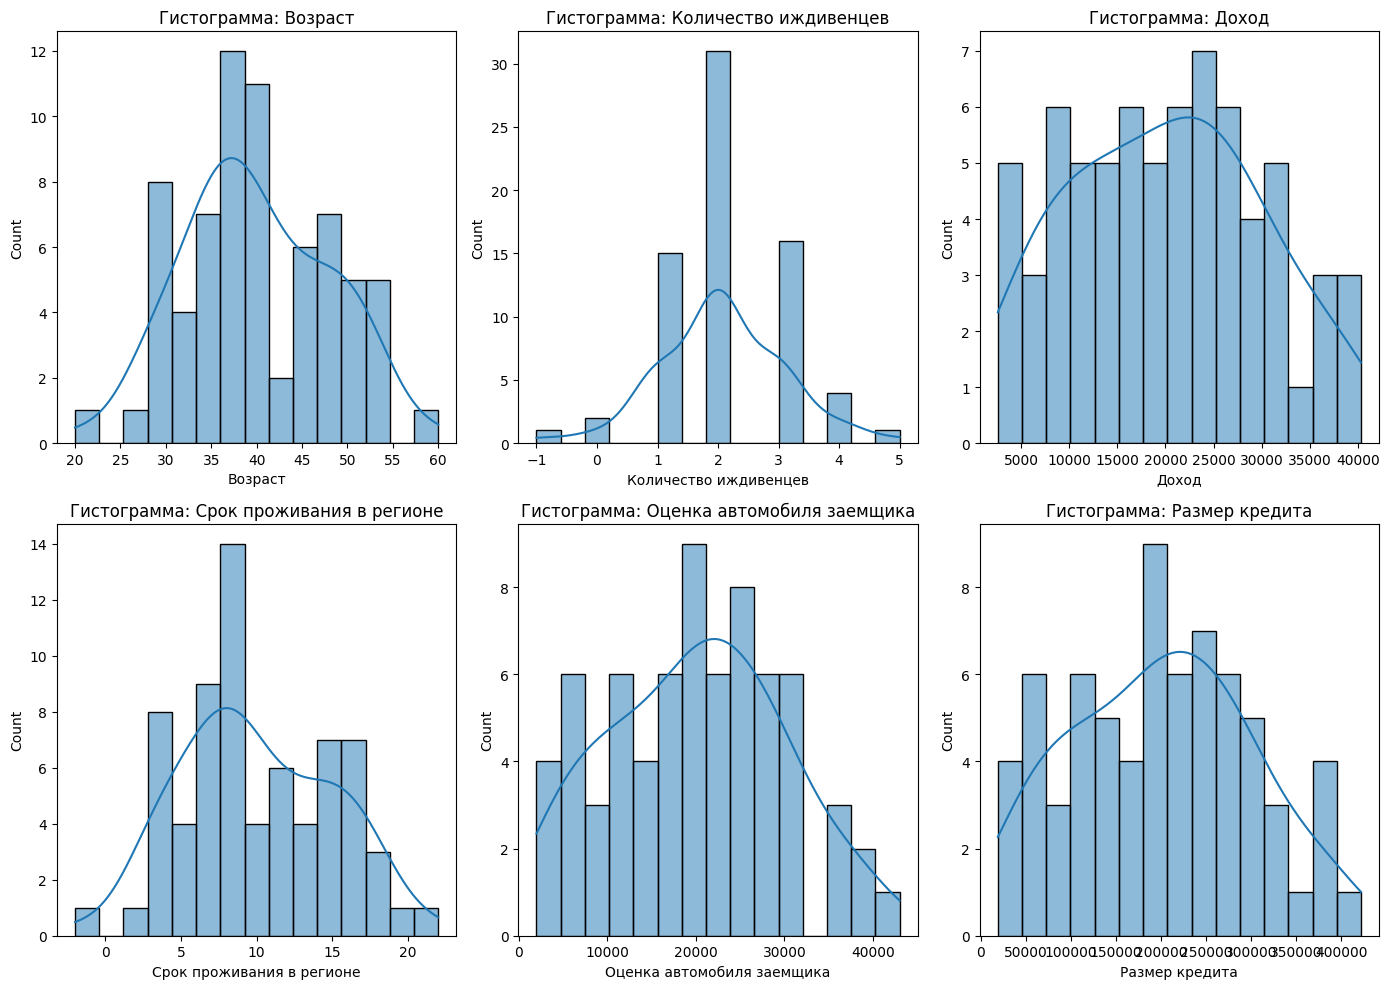

In [14]:
plt.figure(figsize=(14, 10))


for i, col in enumerate(data1.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data1[col], kde=True, bins=15)
    plt.title(f'Гистограмма: {col}')
    plt.tight_layout()


plt.show()


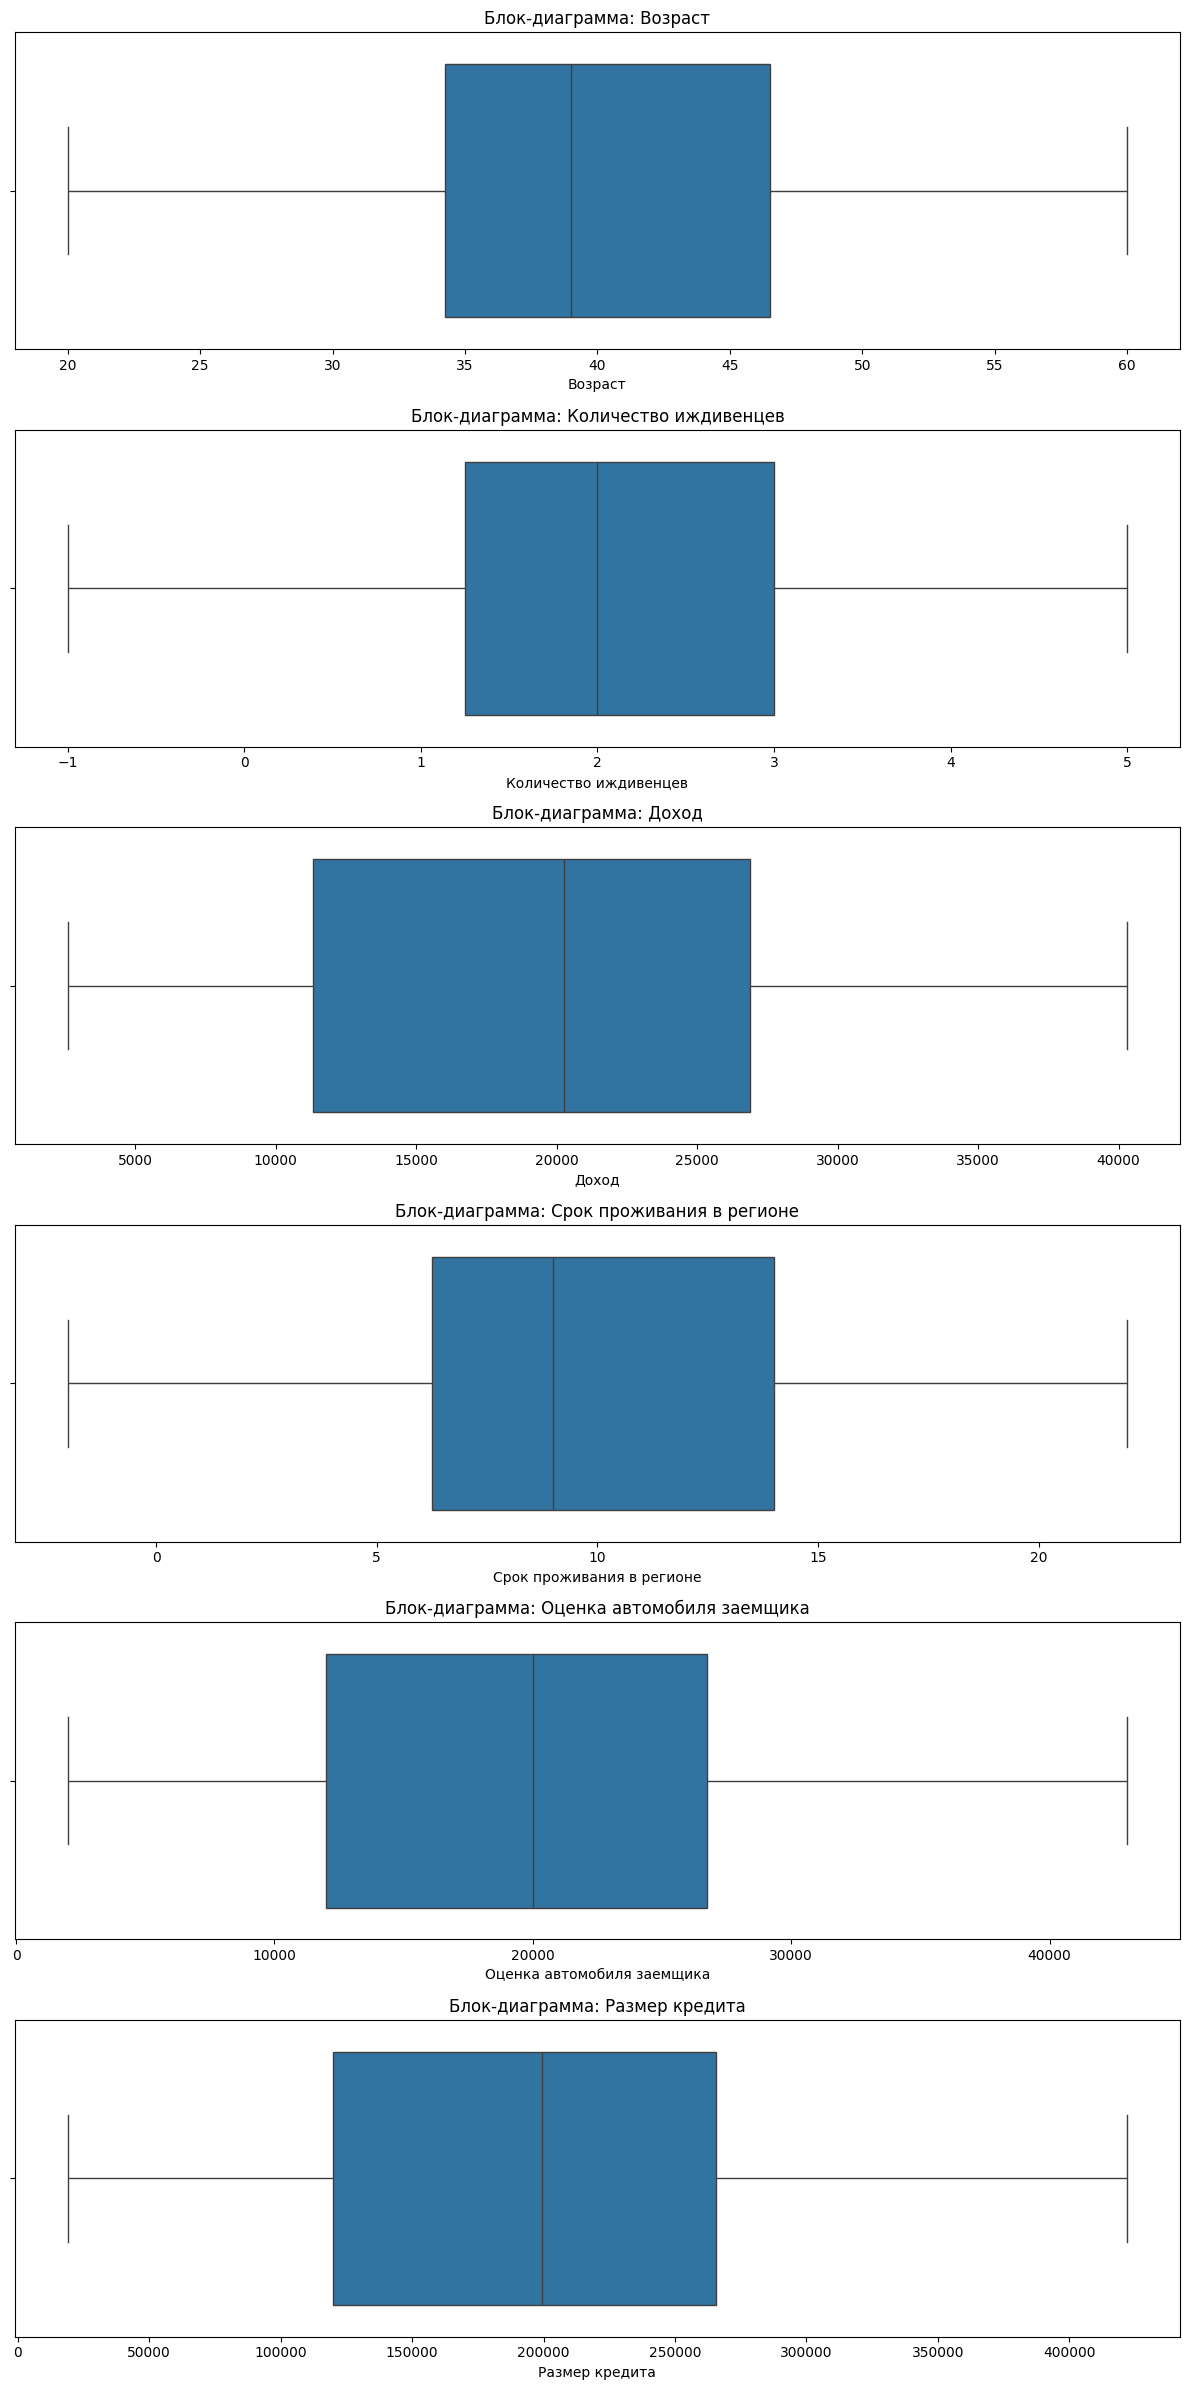

In [15]:
plt.figure(figsize=(12, len(data1.columns) * 4))

for i, column in enumerate(data1.columns, 1):
    plt.subplot(len(data1.columns), 1, i)
    sns.boxplot(x=data1[column])
    plt.title(f'Блок-диаграмма: {column}')
    plt.tight_layout()

plt.show()

1. Возраст:
Средний возраст: около 40 лет, медианный возраст: 39 лет.
Возраст распределён довольно симметрично, так как среднее значение близко к медиане.
Стандартное отклонение составляет 8.07, это говорит о том, что данные по возрасту достаточно сжаты вокруг среднего и признак имеет умеренную вариативность.
Перцентили: 25% людей младше 34 лет, а 75% — моложе 46 лет.
2. Количество иждивенцев:
Среднее количество иждивенцев — около 2.
Медианное значение: также 2.
Стандартное отклонение: 1.03.
Перцентили: 25% имеют <1.25 иждивенца, 75% имеют трех иждивенцев или меньше.
3. Доход:
Средний доход:  20000 рублей, что практически равно значению медианного дохода в 20250 единиц. Это говорит о том, что распределение доходов выглядит симметрично и практически не смещено.
Перцентили: 25% людей имеют доход менее 11325, а 75% — менее 26875.
4. Срок проживания в регионе:
Средний срок проживания: около 10 лет.
Медианное значение 9 лет, что говорит о симметричности распределения.
Стандартное отклонение: 5.02.
Перцентили: 25% людей прожили в регионе менее 6.25 лет, а 75% — менее 14 лет.
5. Оценка автомобиля заемщика:
Средняя оценка автомобиля составляет 20014 долларов, медианная — 20000.
Стандартное отклонение — 9927, что указывает на значительный разброс оценок автомобилей.
Перцентили: 25% людей имеют автомобиль, оценённый менее чем в 12,000, а 75% — менее чем в 26750.
6. Размер кредита:
Средний размер кредита: около 200014 рублей, медианный — 199500 рублей. Среднее немного ниже медианы, что может указывать на возможное смещение распределения вправо (но незначительное).
Стандартное отклонение: около 100000, что указывает на большой разброс в размерах кредитов.
Перцентили: 25% кредитов меньше 119750, а 75% меньше 265750.


По диаграммам видно, что признаки Возраст, Количество иждивенцев, Срок проживания в регионе имеют некоторую смещенность влево (остальные признаки - вправо).



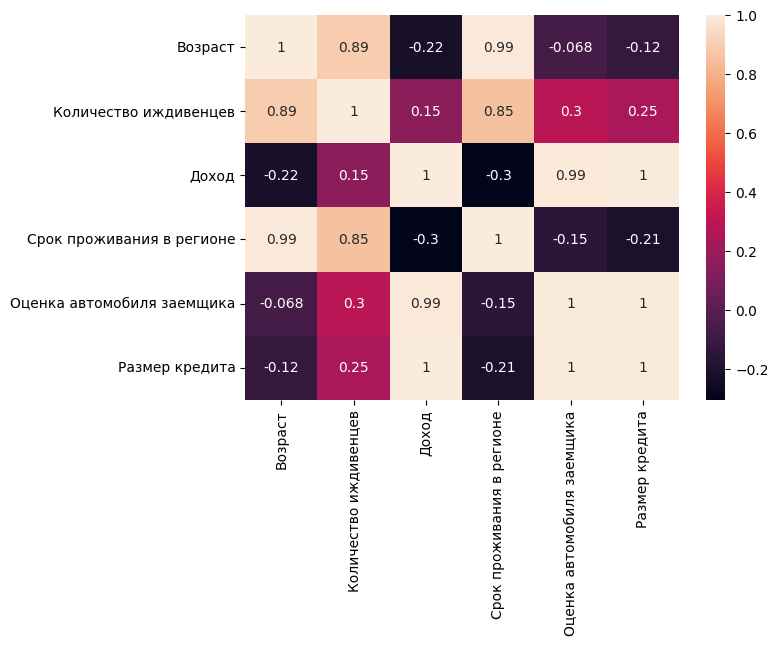

In [16]:
corr = data1.corr(method='pearson')
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True);

Из матрицы корреляций видно, что все признаки, связанные с финансовыми активами имеют высокую корреляцию между собой. В то же время признаки, не связанные с финансами также имеют сильную взаимосвязь. Таким образом, общий набор признаков явно бьется на две группы.


В целом данные хорошие, пропусков в них нет.

In [17]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data1[~((data1 < lower_bound) | (data1 > upper_bound)).any(axis=1)]

In [18]:
print("Размер данных до удаления выбросов:", data1.shape[0])
print("Размер данных после удаления выбросов:", data_cleaned.shape[0])

Размер данных до удаления выбросов: 70
Размер данных после удаления выбросов: 70


Выбросов в данных также не наблюдается.

Нормировка в данных необходима, исходя из вычисленных характеристик для каждого признака в таблице выше (признаки явно имеют различный масштаб).

In [19]:
from sklearn.preprocessing import normalize

Z = pd.DataFrame(normalize(data1, norm='l2', axis=0), columns=data1.columns)
Z.head()

,Возраст,Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита
0,0.102578,0.103556,0.163265,0.075147,0.160722,0.161112
1,0.105509,0.103556,0.140247,0.085883,0.139293,0.138631
2,0.143610,0.155334,0.054600,0.171765,0.064289,0.059413
3,0.152402,0.207112,0.215724,0.171765,0.230369,0.225878
4,0.140679,0.155334,0.061024,0.161030,0.069646,0.065301


In [20]:
euclidean_norms = np.sqrt((Z**2).sum())
euclidean_norms

,0
Возраст,1.0
Количество иждивенцев,1.0
Доход,1.0
Срок проживания в регионе,1.0
Оценка автомобиля заемщика,1.0
Размер кредита,1.0


Провели нормировку данных: видно, что Евклидова норма каждого признака теперь равна 1.

## Снижение размерности (возможность, PCA-метод, карта клиентов)

Сделаем SVD-разложение матрицы.

In [21]:
U, S, Vt = np.linalg.svd(Z, full_matrices=False)

print("Матрица U:\n", U)
print("Матрица S (сингулярные значения):\n", S)
print("Матрица V^T:\n", Vt)

Матрица U:
 [[-0.13456711  0.11541366  0.02162711  0.00206199  0.019265   -0.1781743 ]
 [-0.12508642  0.06871608  0.00546711  0.00508418  0.04889516 -0.21738034]
 [-0.1130732  -0.17294247  0.02076064 -0.04270804  0.07272705 -0.13919764]
 [-0.21080172  0.07008983  0.20652729  0.19683929  0.08742536  0.1922852 ]
 [-0.11386959 -0.15337534  0.03278538 -0.10912653  0.12340329 -0.03465932]
 [-0.06452903 -0.12083047 -0.23726544  0.1726032  -0.19228196 -0.10150793]
 [-0.15949867  0.17325352  0.01314978  0.24170522 -0.001901   -0.14999836]
 [-0.0950882   0.06261025 -0.15171145  0.06786269  0.19715374  0.08357718]
 [-0.11283313  0.1180934  -0.14372629  0.19523202 -0.05556971 -0.02130324]
 [-0.1491474   0.17795747  0.04106716  0.04024669  0.1049668  -0.22979401]
 [-0.14074313 -0.10658211  0.01396624  0.21862697  0.06668306 -0.04512624]
 [-0.09755493 -0.11106248 -0.09757664  0.09582997 -0.02888184 -0.0083526 ]
 [-0.03996279  0.00384218 -0.28149693 -0.07397134  0.04350261 -0.06382887]
 [-0.1043849 

In [22]:
print(f"Сингулярные числа: {S}")
print(f"Квадраты сингулярных чисел: {S**2}")

Сингулярные числа: [2.33212976 0.71599693 0.20835616 0.07074833 0.00934828 0.00376621]
Квадраты сингулярных чисел: [5.43882920e+00 5.12651607e-01 4.34122882e-02 5.00532667e-03
 8.73902839e-05 1.41843356e-05]


In [23]:
print(f"Вклад факторов: {S ** 2 / sum (S ** 2)}")

Вклад факторов: [9.06471534e-01 8.54419346e-02 7.23538137e-03 8.34221112e-04
 1.45650473e-05 2.36405593e-06]


In [24]:
explained_variance = np.cumsum(S**2) / np.sum(S**2)

k1 = np.argmax(explained_variance >= 0.50) + 1
k2 = np.argmax(explained_variance >= 0.75) + 1
k3 = np.argmax(explained_variance >= 0.90) + 1
k4 = np.argmax(explained_variance >= 0.95) + 1
k5 = np.argmax(explained_variance >= 0.98) + 1
print(f"Необходимое количество факторов для объяснения 50% дисперсии: {k1}")
print(f"Необходимое количество факторов для объяснения 75% дисперсии: {k2}")
print(f"Необходимое количество факторов для объяснения 90% дисперсии: {k3}")
print(f"Необходимое количество факторов для объяснения 95% дисперсии: {k4}")
print(f"Необходимое количество факторов для объяснения 98% дисперсии: {k5}")

Необходимое количество факторов для объяснения 50% дисперсии: 1
Необходимое количество факторов для объяснения 75% дисперсии: 1
Необходимое количество факторов для объяснения 90% дисперсии: 1
Необходимое количество факторов для объяснения 95% дисперсии: 2
Необходимое количество факторов для объяснения 98% дисперсии: 2


In [25]:
print(f"Если взять количество факторов, равное 2, то можно объяснить {round(explained_variance[1], 3)*100}% дисперсии")

Если взять количество факторов, равное 2, то можно объяснить 99.2% дисперсии


Размерность снизить можно и, судя по всему, достаточно эффективно (так как 2 фактора объясняют 99.2% дисперсии).

In [26]:
M = Vt.T[:, :2].dot(np.diag(S[:k4]))
print('Coef of factors:\n')
for i, feat in enumerate(Z.columns):
    tab = 30 - len(feat)
    print(f'(z{i+1}) {feat}' + ' '*tab + \
          f'= {M[i, 0]:.2f}*u1 + {M[i, 1]:.2f}*u2' )

Coef of factors:

(z1) Возраст                       = -0.97*u1 + -0.21*u2
(z2) Количество иждивенцев         = -0.96*u1 + -0.25*u2
(z3) Доход                         = -0.95*u1 + 0.31*u2
(z4) Срок проживания в регионе     = -0.91*u1 + -0.41*u2
(z5) Оценка автомобиля заемщика    = -0.96*u1 + 0.26*u2
(z6) Размер кредита                = -0.96*u1 + 0.28*u2


Фактор u1 одинаково сильно связан со всеми признаками, причем отрицательные коэффициенты могут указывать на то, что этот фактор описывает некоторую общую тенденцию, которая противоположна росту значений признаков. Сложно предложить ему интерпретацию, но общая картина такова, что высокие значения фактора связаны с низким уровнем финансов и в то же время с молодостью и небольшим количеством иждивенцев.

Фактор u2 более интересен в этом плане. Его вклад невысокий, однако имеется разнообразие во влиянии на признаки. Фактор прямо связан с количеством финансовых активов, но в то же время имеет обратную связь с остальными признаками, отражая показатель мобильности человека (меньше возраст, срок проживания и количество иждивенцев - выше возможности к смене региона проживания).

В то же время группы по коэффициентам не образуются, ибо вклад первого фактора для всех признаков сильно больше второго.

Посмотрим, насколько хорошо сохранена информация при переходе от исходного пространства признаков к пространству меньшей размерности, посчитав погрешность аппроксимации в норме Фробениуса и операторной норме.

In [27]:
Uk = U[:, :k4]
Sk = np.diag(S[:k4])
Vk = Vt[:k4, :]

Zk = Uk @ Sk @ Vk
Zk

array([[ 0.10591256,  0.10055587,  0.16337731,  0.07508696,  0.15997303,
         0.16145012],
       [ 0.10650006,  0.10295622,  0.14007426,  0.0856422 ,  0.13863256,
         0.13929579],
       [ 0.14533232,  0.1508778 ,  0.05474662,  0.1739936 ,  0.06394332,
         0.0602167 ],
       [ 0.18902028,  0.1847495 ,  0.22208185,  0.16311041,  0.22169424,
         0.2219706 ],
       [ 0.14201773,  0.14682864,  0.06148778,  0.16667926,  0.06982079,
         0.06645047],
       [ 0.08755871,  0.09154729,  0.02447469,  0.10838971,  0.03071185,
         0.02817774],
       [ 0.11792612,  0.11022004,  0.20479418,  0.07401981,  0.19913069,
         0.20155241],
       [ 0.07879408,  0.07571401,  0.10965366,  0.06084137,  0.10809432,
         0.10878942],
       [ 0.08435673,  0.07907165,  0.14350936,  0.05420001,  0.13970255,
         0.14133347],
       [ 0.10694428,  0.09914474,  0.19637974,  0.06266366,  0.19037142,
         0.19292949],
       [ 0.15821297,  0.16107034,  0.10137534,  0.

In [28]:
print('Исходная матрица Z:')
print(np.around(Z.values[:5], 3))

print('\nАппроксимированная матрица Z:')
print(np.around(Zk[:5], 3))

Исходная матрица Z:
[[0.103 0.104 0.163 0.075 0.161 0.161]
 [0.106 0.104 0.14  0.086 0.139 0.139]
 [0.144 0.155 0.055 0.172 0.064 0.059]
 [0.152 0.207 0.216 0.172 0.23  0.226]
 [0.141 0.155 0.061 0.161 0.07  0.065]]

Аппроксимированная матрица Z:
[[0.106 0.101 0.163 0.075 0.16  0.161]
 [0.107 0.103 0.14  0.086 0.139 0.139]
 [0.145 0.151 0.055 0.174 0.064 0.06 ]
 [0.189 0.185 0.222 0.163 0.222 0.222]
 [0.142 0.147 0.061 0.167 0.07  0.066]]


In [29]:
frobenius_norm_error = np.linalg.norm(Z - Zk, 'fro') ** 2
operator_norm_error = np.linalg.norm(Z - Zk, 2)

print(f"Погрешность аппроксимации в норме Фробениуса: {frobenius_norm_error}")
print(f"Погрешность аппроксимации в операторной норме: {operator_norm_error}")

Погрешность аппроксимации в норме Фробениуса: 0.04851918948624598
Погрешность аппроксимации в операторной норме: 0.20835615707840902


In [30]:
relative_frobenius_error = frobenius_norm_error / np.linalg.norm(Z, 'fro') ** 2
relative_operator_error = operator_norm_error / np.linalg.norm(Z, 2)

print(f"Относительная погрешность в норме Фробениуса: {relative_frobenius_error}")
print(f"Относительная погрешность в операторной норме: {relative_operator_error}")

Относительная погрешность в норме Фробениуса: 0.008086531581040998
Относительная погрешность в операторной норме: 0.08934157992759192


Видим, что погрешности небольшие, следовательно информация сохранена хорошо после снижения размерности методом PCA.

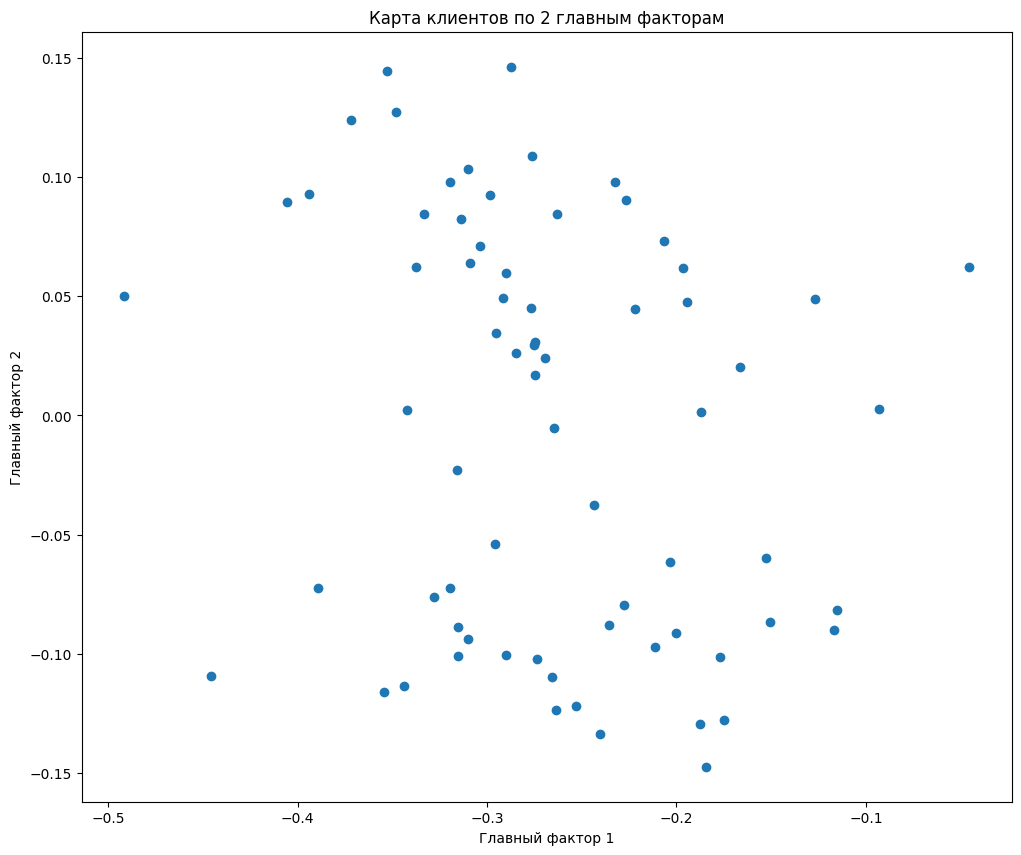

In [31]:
client_representation = Uk @ Sk

plt.figure(figsize=(12, 10))

plt.scatter(client_representation[:, 0], client_representation[:, 1])

plt.title(f'Карта клиентов по {k4} главным факторам')
plt.xlabel('Главный фактор 1')
plt.ylabel('Главный фактор 2')

plt.show()

На этой карте не очень явно, но можно заметить два кластера в верхней и нижней частях. Посмотрим, что покажет алгоритм кластеризации.

## Кластеризация (distance and similarity, EM-алгоритм, оценка качества, RAND-индекс)

In [33]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances, cosine_distances
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data2 = data.drop(data.columns[-3:], axis=1)

Считаем distance matrix и similarity matrix

In [57]:
distance_matrix_X = euclidean_distances(data2, data2)

In [58]:
distance_matrix_X

array([[     0.        ,  42408.60764043, 191927.30467028, ...,
         27274.34769156, 254558.0683243 , 264637.28025356],
       [ 42408.60764043,      0.        , 149519.23031503, ...,
         69676.10825814, 212149.85297426, 222229.07117207],
       [191927.30467028, 149519.23031503,      0.        , ...,
        219193.88799417,  62644.71263403,  72725.23665139],
       ...,
       [ 27274.34769156,  69676.10825814, 219193.88799417, ...,
             0.        , 281820.22700119, 291898.95558224],
       [254558.0683243 , 212149.85297426,  62644.71263403, ...,
        281820.22700119,      0.        ,  10081.66677688],
       [264637.28025356, 222229.07117207,  72725.23665139, ...,
        291898.95558224,  10081.66677688,      0.        ]])

In [67]:
import math

def calculate_similarity(vec1, vec2, sigma=0.5):
    distance = np.linalg.norm(vec1 - vec2)
    return math.exp(-distance**2 / (2 * sigma))

def build_similarity_matrix(dataframe):

    size = dataframe.shape[0]
    similarity_matrix = np.zeros((size, size))


    for row_idx in range(size):
        for col_idx in range(size):
            similarity_matrix[row_idx, col_idx] = calculate_similarity(
                dataframe.iloc[row_idx, :], dataframe.iloc[col_idx, :]
            )


    return pd.DataFrame(similarity_matrix)

In [ ]:
similarity_matrix_X = build_similarity_matrix(data2)



# EM - алгоритм

In [72]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_norm = scaler_X.fit_transform(data2)

In [74]:
gmm_X = GaussianMixture(n_components=2, random_state=42).fit(X_norm)
clusters_X_em = gmm_X.predict(X_norm)


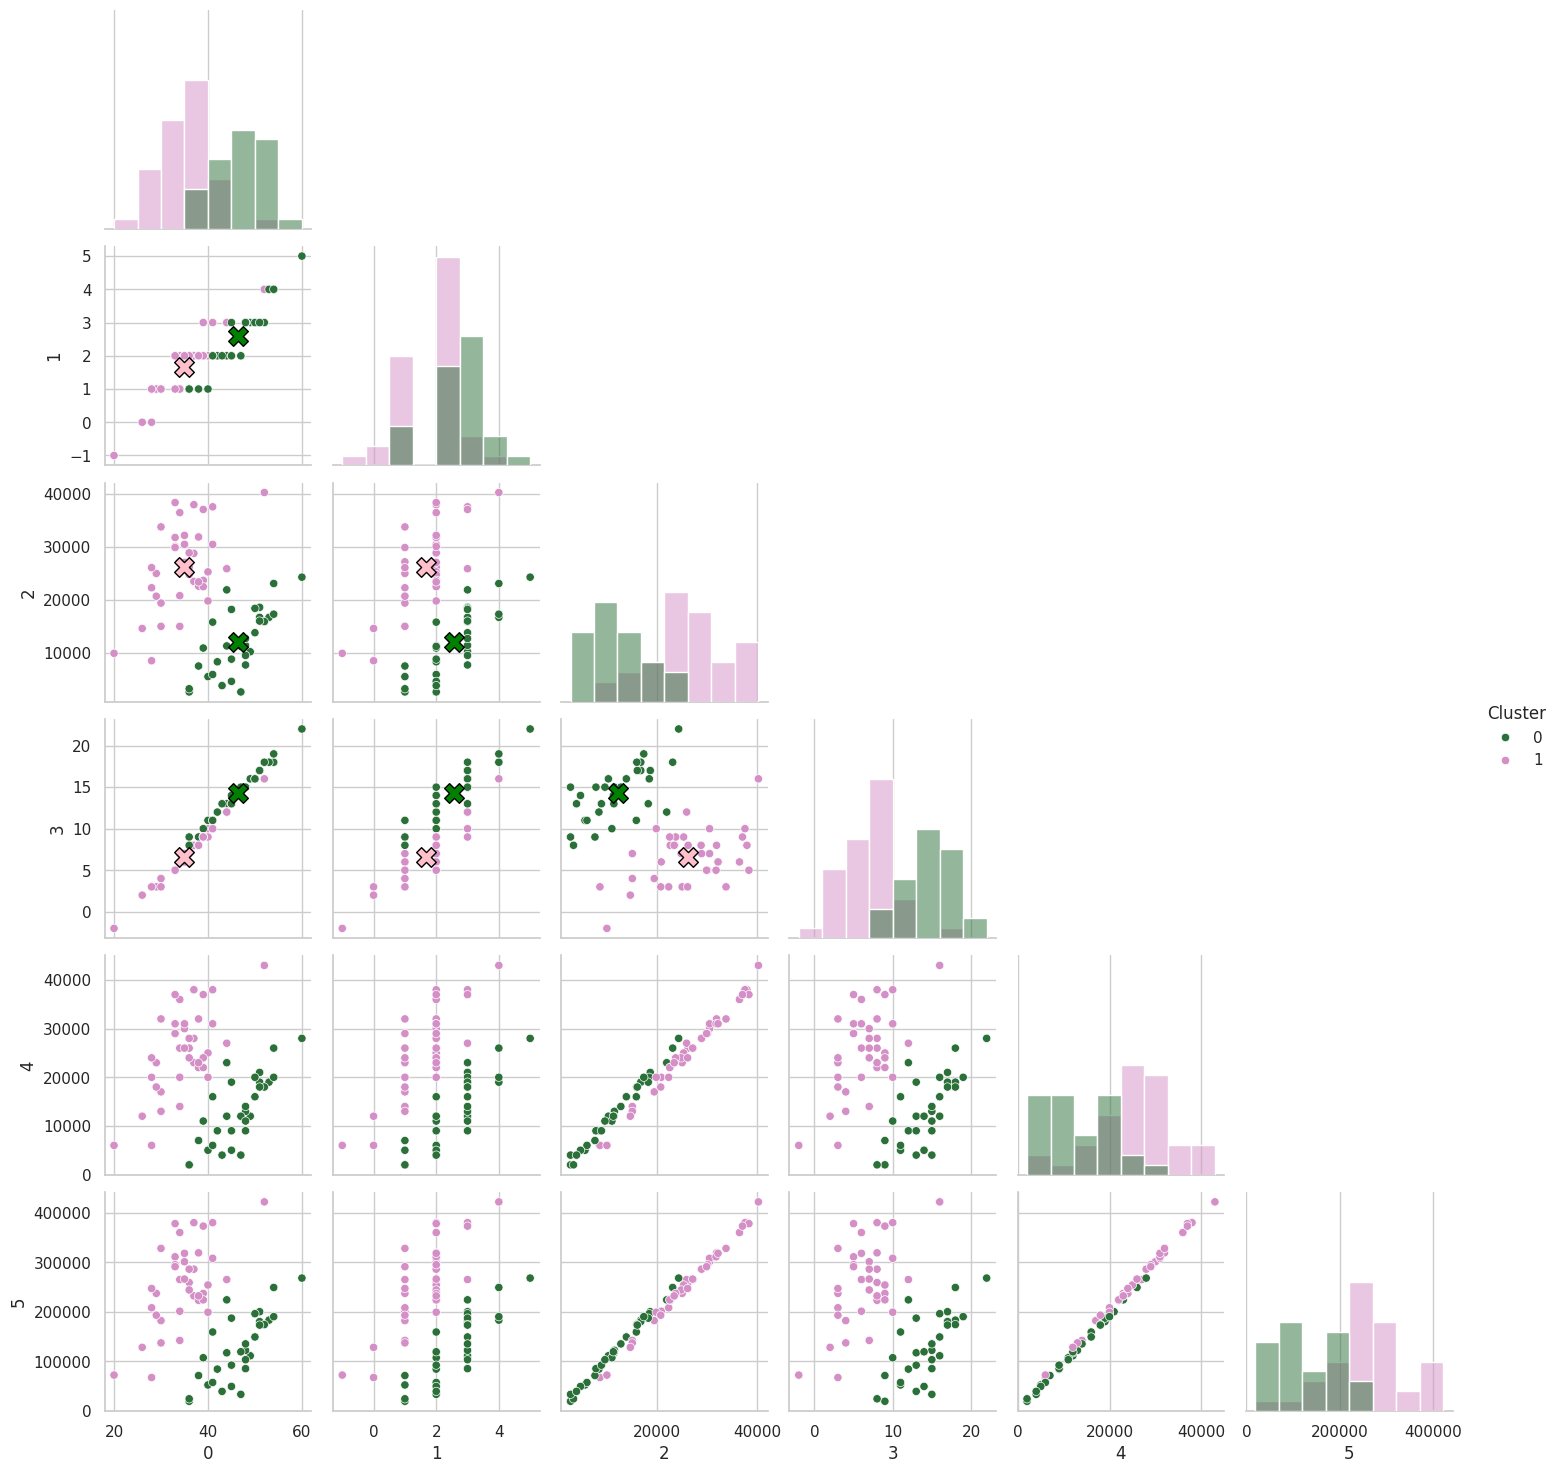

In [76]:
centers_X_em = scaler_X.inverse_transform(gmm_X.means_)
data2['Cluster'] = clusters_X_em

sns.set(style="whitegrid")
pairplot_X = sns.pairplot(data2, diag_kind="hist", hue="Cluster", palette="cubehelix", height=2.5, corner=True)

for i, (x, y) in enumerate([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]):
  ax = pairplot_X.axes[y][x]
  if x != y:
    for center, cluster_label in zip(centers_X_em, range(len(centers_X_em))):
      ax.scatter(
        center[x], center[y],
        s=200, c=['green', 'pink'][cluster_label], edgecolor='black', marker='X', label=f'Center {cluster_label+1}'
        )